In [42]:
import pandas as pd
import random
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
import math
import statistics as stat
from scipy.stats import norm
import numpy as np
import pprint


In order to execute this notebokk we should upload the following files:
- shooting_stat_team.xlsx
- shooting_stat-oppenant.xlsx
- all_players_shooting_stats.xlsx
- all_players_wages.xlsx



In [43]:
df = pd.read_excel('/content/shooting_stat_team.xlsx')
df1 = pd.read_excel('/content/shooting_stat-oppenant.xlsx')
df

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Squad,# Pl,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Arsenal,26,38.0,84,589,194,32.9,15.50,5.11,0.14,0.42,16.0,16,3,4,71.9,69.1,0.12,12.1,11.9
1,Aston Villa,26,38.0,49,427,145,34.0,11.24,3.82,0.11,0.32,18.0,18,3,4,50.2,47.2,0.11,-1.2,-1.2
2,Bournemouth,31,38.0,37,358,126,35.2,9.42,3.32,0.10,0.29,15.5,14,0,0,38.6,38.6,0.11,-1.6,-1.6
3,Brentford,25,38.0,56,400,147,36.8,10.53,3.87,0.12,0.33,15.7,14,7,8,56.8,50.6,0.13,-0.8,-1.6
4,Brighton,29,38.0,68,607,219,36.1,15.97,5.76,0.10,0.28,16.8,12,6,6,73.3,68.9,0.12,-5.3,-6.9
5,Chelsea,32,38.0,37,481,151,31.4,12.66,3.97,0.07,0.23,16.8,10,3,3,49.5,47.2,0.10,-12.5,-13.2
6,Crystal Palace,26,38.0,38,423,133,31.4,11.13,3.50,0.09,0.28,17.6,23,1,3,39.3,36.8,0.09,-1.3,0.2
7,Everton,28,38.0,32,426,143,33.6,11.21,3.76,0.07,0.20,16.8,12,3,3,45.2,42.8,0.10,-13.2,-13.8
8,Fulham,29,38.0,52,420,137,32.6,11.05,3.61,0.11,0.34,17.3,17,5,9,46.2,39.1,0.10,5.8,7.9
9,Leeds United,29,38.0,45,459,141,30.7,12.08,3.71,0.10,0.31,16.6,19,1,3,47.4,45.0,0.10,-2.4,-1.0


# ***Team Analysis and ratings***

***Axis2: Shooting Stats***

***sub-axis2.1 : Number of Shots***

In [44]:
dico = df.set_index('Squad')['Sh'].to_dict()
dic = df1.set_index('Squad')['Sh'].to_dict()

In [45]:
d = dico.copy()
d1 = dico.copy()
for (key,value) in d.items():
  if value > np.percentile(list(d.values()),90):
    d1[key]=20
  if value < np.percentile(list(d.values()),90) and value > np.percentile(list(d.values()),80):
    d1[key]=18
  if value < np.percentile(list(d.values()),80) and value > np.percentile(list(d.values()),70):
    d1[key]=16
  if value < np.percentile(list(d.values()),70) and value > np.percentile(list(d.values()),60):
    d1[key]=14
  if value < np.percentile(list(d.values()),60) and value > np.percentile(list(d.values()),50):
    d1[key]=12
  if value < np.percentile(list(d.values()),50) and value > np.percentile(list(d.values()),40):
    d1[key]=10
  if value < np.percentile(list(d.values()),40) and value > np.percentile(list(d.values()),30):
    d1[key]=8
  if value < np.percentile(list(d.values()),30) and value > np.percentile(list(d.values()),20):
    d1[key]=6
  if value < np.percentile(list(d.values()),20) and value > np.percentile(list(d.values()),10):
    d1[key]=4
  if value < np.percentile(list(d.values()),10):
    d1[key]=2

pprint.pprint(d1)
print(f"Mean :{stat.mean(list(d1.values()))}\n")

dd = dic.copy()
dd1 = dic.copy()
for (key,value) in dd.items():
  if value > np.percentile(list(dd.values()),90):
    dd1[key]=2
  if value < np.percentile(list(dd.values()),90) and value > np.percentile(list(dd.values()),80):
    dd1[key]=4
  if value < np.percentile(list(dd.values()),80) and value > np.percentile(list(dd.values()),70):
    dd1[key]=6
  if value < np.percentile(list(dd.values()),70) and value > np.percentile(list(dd.values()),60):
    dd1[key]=8
  if value < np.percentile(list(dd.values()),60) and value > np.percentile(list(dd.values()),50):
    dd1[key]=10
  if value < np.percentile(list(dd.values()),50) and value > np.percentile(list(dd.values()),40):
    dd1[key]=12
  if value < np.percentile(list(dd.values()),40) and value > np.percentile(list(dd.values()),30):
    dd1[key]=14
  if value < np.percentile(list(dd.values()),30) and value > np.percentile(list(dd.values()),20):
    dd1[key]=16
  if value < np.percentile(list(dd.values()),20) and value > np.percentile(list(dd.values()),10):
    dd1[key]=18
  if value < np.percentile(list(dd.values()),10):
    dd1[key]=20

pprint.pprint(dd1)
print(f"Mean :{stat.mean(list(dd1.values()))}\n")


{'Arsenal': 16,
 'Aston Villa': 10,
 'Bournemouth': 2,
 'Brentford': 4,
 'Brighton': 20,
 'Chelsea': 14,
 'Crystal Palace': 8,
 'Everton': 10,
 'Fulham': 8,
 'Leeds United': 12,
 'Leicester City': 6,
 'Liverpool': 20,
 'Manchester City': 18,
 'Manchester Utd': 18,
 'Newcastle Utd': 16,
 "Nott'ham Forest": 2,
 'Southampton': 6,
 'Tottenham': 14,
 'West Ham': 12,
 'Wolves': 4}
Mean :11

{'Arsenal': 20,
 'Aston Villa': 16,
 'Bournemouth': 2,
 'Brentford': 4,
 'Brighton': 18,
 'Chelsea': 14,
 'Crystal Palace': 14,
 'Everton': 2,
 'Fulham': 10,
 'Leeds United': 8,
 'Leicester City': 4,
 'Liverpool': 18,
 'Manchester City': 20,
 'Manchester Utd': 12,
 'Newcastle Utd': 16,
 "Nott'ham Forest": 6,
 'Southampton': 8,
 'Tottenham': 10,
 'West Ham': 12,
 'Wolves': 6}
Mean :11



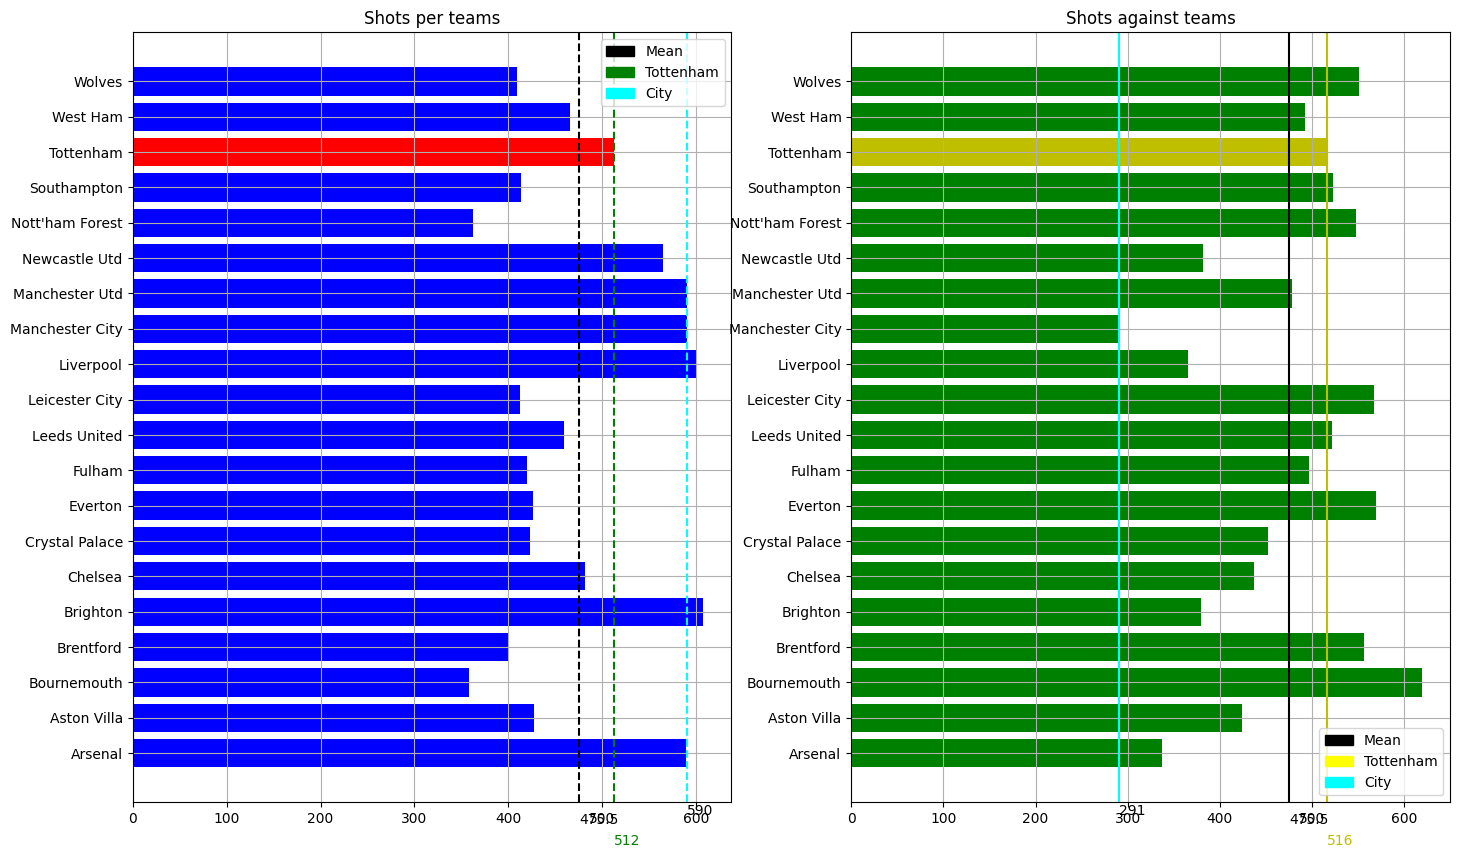

In [46]:
fig, ax = plt.subplots(1,2,figsize=(17,10))
colors = []
color = []
for value in list(dico.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax[0].barh(list(dico.keys()),list(dico.values()),color=colors)
ax[1].barh(list(dic.keys()),list(dic.values()),color=color)
ax[0].axvline(stat.mean(list(dico.values())),color='black',linestyle='--')
ax[0].text(stat.mean(list(dico.values())),-2, f'{stat.mean(list(dico.values()))}',color='black')
ax[0].axvline(dico["Tottenham"],color='green',linestyle='--')
ax[0].text(dico["Tottenham"],-2.6, f'{dico["Tottenham"]}',color='green')
ax[0].axvline(dico["Manchester City"],color='cyan',linestyle='--')
ax[0].text(dico["Manchester City"],-1.75, f'{dico["Manchester City"]}')
ax[1].axvline(stat.mean(list(dic.values())),color='black',linestyle='-')
ax[1].text(stat.mean(list(dic.values())),-2, f'{stat.mean(list(dic.values()))}',color='black')
ax[1].axvline(dic["Tottenham"],color='y',linestyle='-')
ax[1].text(dic["Tottenham"],-2.6, f'{dic["Tottenham"]}',color='y')
ax[1].axvline(dic["Manchester City"],color='cyan',linestyle='-')
ax[1].text(dic["Manchester City"],-1.75, f'{dic["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax[0].legend(handles=[p1,p2,p3])
ax[1].legend(handles=[p1,p4,p3])
ax[0].set_title('Shots per teams')
ax[1].set_title('Shots against teams')
ax[0].grid(True)
ax[1].grid(True)

***subaxis2.2 : %Shot on Target***

In [47]:
dico1 = df.set_index('Squad')['SoT%'].to_dict()
dic1 = df1.set_index('Squad')['SoT%'].to_dict()

In [48]:
d2 = dico1.copy()
d3 = dico1.copy()
for (key,value) in d2.items():
  if value > np.percentile(list(d2.values()),90):
    d3[key]=20
  if value <= np.percentile(list(d2.values()),90) and value > np.percentile(list(d2.values()),80):
    d3[key]=18
  if value <= np.percentile(list(d2.values()),80) and value > np.percentile(list(d2.values()),70):
    d3[key]=16
  if value <= np.percentile(list(d2.values()),70) and value > np.percentile(list(d2.values()),60):
    d3[key]=14
  if value <= np.percentile(list(d2.values()),60) and value > np.percentile(list(d2.values()),50):
    d3[key]=12
  if value <= np.percentile(list(d2.values()),50) and value > np.percentile(list(d2.values()),40):
    d3[key]=10
  if value <= np.percentile(list(d2.values()),40) and value > np.percentile(list(d2.values()),30):
    d3[key]=8
  if value <= np.percentile(list(d2.values()),30) and value > np.percentile(list(d2.values()),20):
    d3[key]=6
  if value <= np.percentile(list(d2.values()),20) and value > np.percentile(list(d2.values()),10):
    d3[key]=4
  if value <= np.percentile(list(d2.values()),10):
    d3[key]=2

pprint.pprint(d3)
print(f"Mean :{stat.mean(list(d3.values()))}\n")

dd2 = dic1.copy()
dd3 = dic1.copy()
for (key,value) in dd2.items():
  if value > np.percentile(list(dd2.values()),90):
    dd3[key]=2
  if value <= np.percentile(list(dd2.values()),90) and value > np.percentile(list(dd2.values()),80):
    dd3[key]=4
  if value <= np.percentile(list(dd2.values()),80) and value > np.percentile(list(dd2.values()),70):
    dd3[key]=6
  if value <= np.percentile(list(dd2.values()),70) and value > np.percentile(list(dd2.values()),60):
    dd3[key]=8
  if value <= np.percentile(list(dd2.values()),60) and value > np.percentile(list(dd2.values()),50):
    dd3[key]=10
  if value <= np.percentile(list(dd2.values()),50) and value > np.percentile(list(dd2.values()),40):
    dd3[key]=12
  if value <= np.percentile(list(dd2.values()),40) and value > np.percentile(list(dd2.values()),30):
    dd3[key]=14
  if value <= np.percentile(list(dd2.values()),30) and value > np.percentile(list(dd2.values()),20):
    dd3[key]=16
  if value <= np.percentile(list(dd2.values()),20) and value > np.percentile(list(dd2.values()),10):
    dd3[key]=18
  if value <= np.percentile(list(dd2.values()),10):
    dd3[key]=20

pprint.pprint(dd3)
print(f"Mean :{stat.mean(list(dd3.values()))}\n")


{'Arsenal': 10,
 'Aston Villa': 14,
 'Bournemouth': 18,
 'Brentford': 20,
 'Brighton': 18,
 'Chelsea': 6,
 'Crystal Palace': 6,
 'Everton': 12,
 'Fulham': 8,
 'Leeds United': 4,
 'Leicester City': 14,
 'Liverpool': 12,
 'Manchester City': 16,
 'Manchester Utd': 16,
 'Newcastle Utd': 8,
 "Nott'ham Forest": 4,
 'Southampton': 8,
 'Tottenham': 20,
 'West Ham': 2,
 'Wolves': 2}
Mean :10.9

{'Arsenal': 2,
 'Aston Villa': 8,
 'Bournemouth': 14,
 'Brentford': 6,
 'Brighton': 12,
 'Chelsea': 4,
 'Crystal Palace': 8,
 'Everton': 16,
 'Fulham': 4,
 'Leeds United': 8,
 'Leicester City': 18,
 'Liverpool': 2,
 'Manchester City': 18,
 'Manchester Utd': 20,
 'Newcastle Utd': 12,
 "Nott'ham Forest": 14,
 'Southampton': 20,
 'Tottenham': 10,
 'West Ham': 10,
 'Wolves': 16}
Mean :11.1



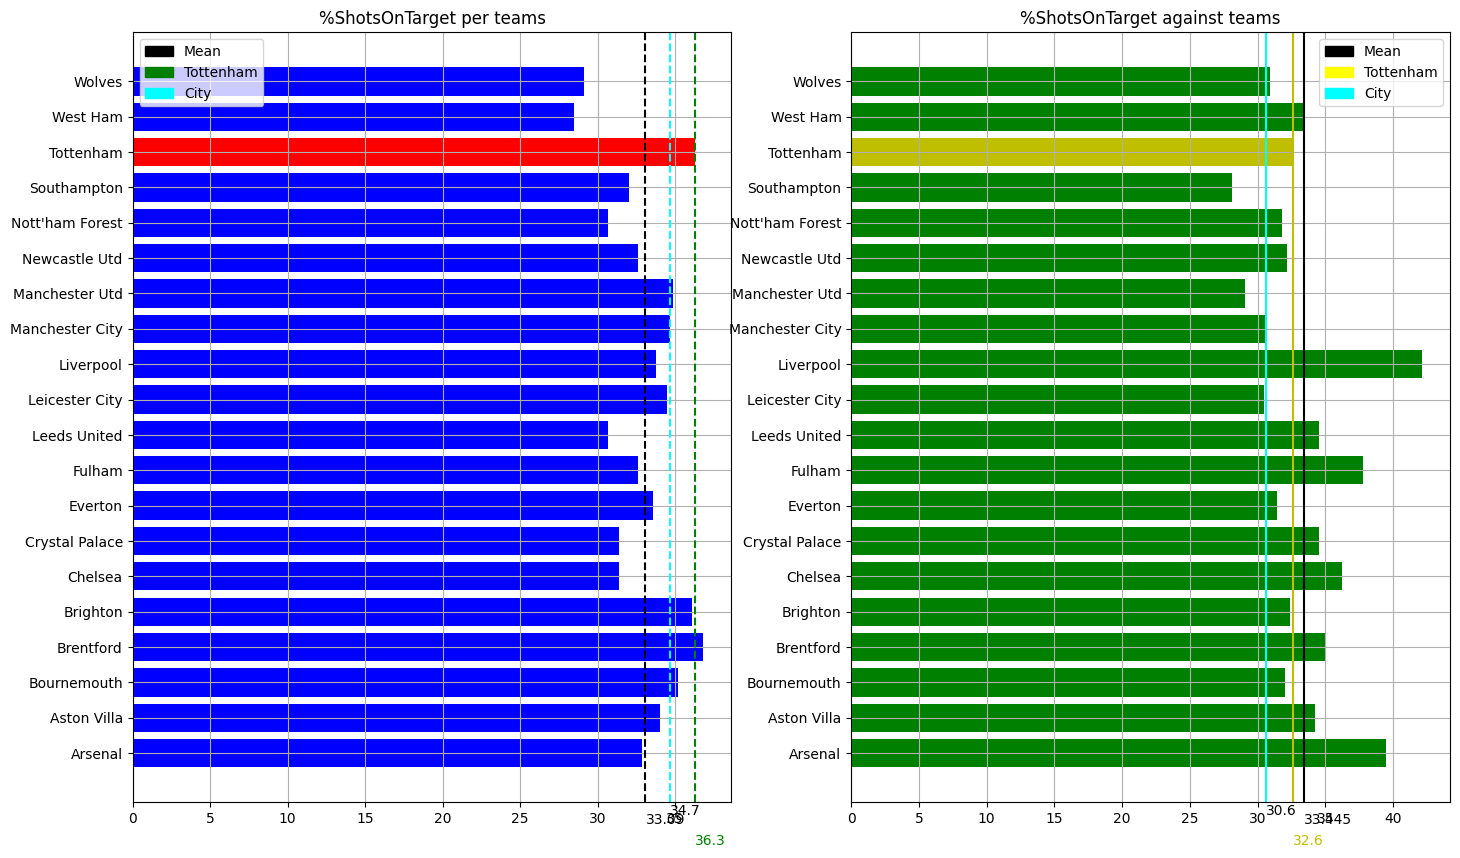

In [49]:
fig, ax = plt.subplots(1,2,figsize=(17,10))
colors = []
color = []
for value in list(dico.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax[0].barh(list(dico1.keys()),list(dico1.values()),color=colors)
ax[1].barh(list(dic1.keys()),list(dic1.values()),color=color)
ax[0].axvline(stat.mean(list(dico1.values())),color='black',linestyle='--')
ax[0].text(stat.mean(list(dico1.values())),-2, f'{stat.mean(list(dico1.values()))}',color='black')
ax[0].axvline(dico1["Tottenham"],color='green',linestyle='--')
ax[0].text(dico1["Tottenham"],-2.6, f'{dico1["Tottenham"]}',color='green')
ax[0].axvline(dico1["Manchester City"],color='cyan',linestyle='--')
ax[0].text(dico1["Manchester City"],-1.75, f'{dico1["Manchester City"]}')
ax[1].axvline(stat.mean(list(dic1.values())),color='black',linestyle='-')
ax[1].text(stat.mean(list(dic1.values())),-2, f'{stat.mean(list(dic1.values()))}',color='black')
ax[1].axvline(dic1["Tottenham"],color='y',linestyle='-')
ax[1].text(dic1["Tottenham"],-2.6, f'{dic1["Tottenham"]}',color='y')
ax[1].axvline(dic1["Manchester City"],color='cyan',linestyle='-')
ax[1].text(dic1["Manchester City"],-1.75, f'{dic1["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax[0].legend(handles=[p1,p2,p3])
ax[1].legend(handles=[p1,p4,p3])
ax[0].set_title('%ShotsOnTarget per teams')
ax[1].set_title('%ShotsOnTarget against teams')
ax[0].grid(True)
ax[1].grid(True)

***subaxis2.3 : Shot on Target per game***

In [50]:
dico2 = df.set_index('Squad')['SoT/90'].to_dict()
dic2 = df1.set_index('Squad')['SoT/90'].to_dict()

In [51]:
d4 = dico2.copy()
d5 = dico2.copy()
for (key,value) in d4.items():
  if value > np.percentile(list(d4.values()),90):
    d5[key]=20
  if value < np.percentile(list(d4.values()),90) and value > np.percentile(list(d4.values()),80):
    d5[key]=18
  if value < np.percentile(list(d4.values()),80) and value > np.percentile(list(d4.values()),70):
    d5[key]=16
  if value < np.percentile(list(d4.values()),70) and value > np.percentile(list(d4.values()),60):
    d5[key]=14
  if value < np.percentile(list(d4.values()),60) and value > np.percentile(list(d4.values()),50):
    d5[key]=12
  if value < np.percentile(list(d4.values()),50) and value > np.percentile(list(d4.values()),40):
    d5[key]=10
  if value < np.percentile(list(d4.values()),40) and value > np.percentile(list(d4.values()),30):
    d5[key]=8
  if value < np.percentile(list(d4.values()),30) and value > np.percentile(list(d4.values()),20):
    d5[key]=6
  if value < np.percentile(list(d4.values()),20) and value > np.percentile(list(d4.values()),10):
    d5[key]=4
  if value < np.percentile(list(d4.values()),10):
    d5[key]=2

pprint.pprint(d5)
print(f"Mean :{stat.mean(list(d5.values()))}\n")

dd4 = dic2.copy()
dd5 = dic2.copy()
for (key,value) in dd4.items():
  if value > np.percentile(list(dd4.values()),90):
    dd5[key]=2
  if value < np.percentile(list(dd4.values()),90) and value > np.percentile(list(dd4.values()),80):
    dd5[key]=4
  if value < np.percentile(list(dd4.values()),80) and value > np.percentile(list(dd4.values()),70):
    dd5[key]=6
  if value < np.percentile(list(dd4.values()),70) and value > np.percentile(list(dd4.values()),60):
    dd5[key]=8
  if value < np.percentile(list(dd4.values()),60) and value > np.percentile(list(dd4.values()),50):
    dd5[key]=10
  if value < np.percentile(list(dd4.values()),50) and value > np.percentile(list(dd4.values()),40):
    dd5[key]=12
  if value < np.percentile(list(dd4.values()),40) and value > np.percentile(list(dd4.values()),30):
    dd5[key]=14
  if value < np.percentile(list(dd4.values()),30) and value > np.percentile(list(dd4.values()),20):
    dd5[key]=16
  if value < np.percentile(list(dd4.values()),20) and value > np.percentile(list(dd4.values()),10):
    dd5[key]=18
  if value < np.percentile(list(dd4.values()),10):
    dd5[key]=20

pprint.pprint(dd5)
print(f"Mean :{stat.mean(list(dd5.values()))}\n")

{'Arsenal': 16,
 'Aston Villa': 12,
 'Bournemouth': 4,
 'Brentford': 12,
 'Brighton': 20,
 'Chelsea': 14,
 'Crystal Palace': 6,
 'Everton': 10,
 'Fulham': 8,
 'Leeds United': 8,
 'Leicester City': 10,
 'Liverpool': 18,
 'Manchester City': 18,
 'Manchester Utd': 20,
 'Newcastle Utd': 14,
 "Nott'ham Forest": 2,
 'Southampton': 4,
 'Tottenham': 16,
 'West Ham': 6,
 'Wolves': 2}
Mean :11

{'Arsenal': 18,
 'Aston Villa': 16,
 'Bournemouth': 2,
 'Brentford': 2,
 'Brighton': 3.24,
 'Chelsea': 12,
 'Crystal Palace': 12,
 'Everton': 6,
 'Fulham': 4,
 'Leeds United': 4,
 'Leicester City': 8,
 'Liverpool': 14,
 'Manchester City': 20,
 'Manchester Utd': 16,
 'Newcastle Utd': 3.24,
 "Nott'ham Forest": 6,
 'Southampton': 14,
 'Tottenham': 10,
 'West Ham': 10,
 'Wolves': 8}
Mean :9.424



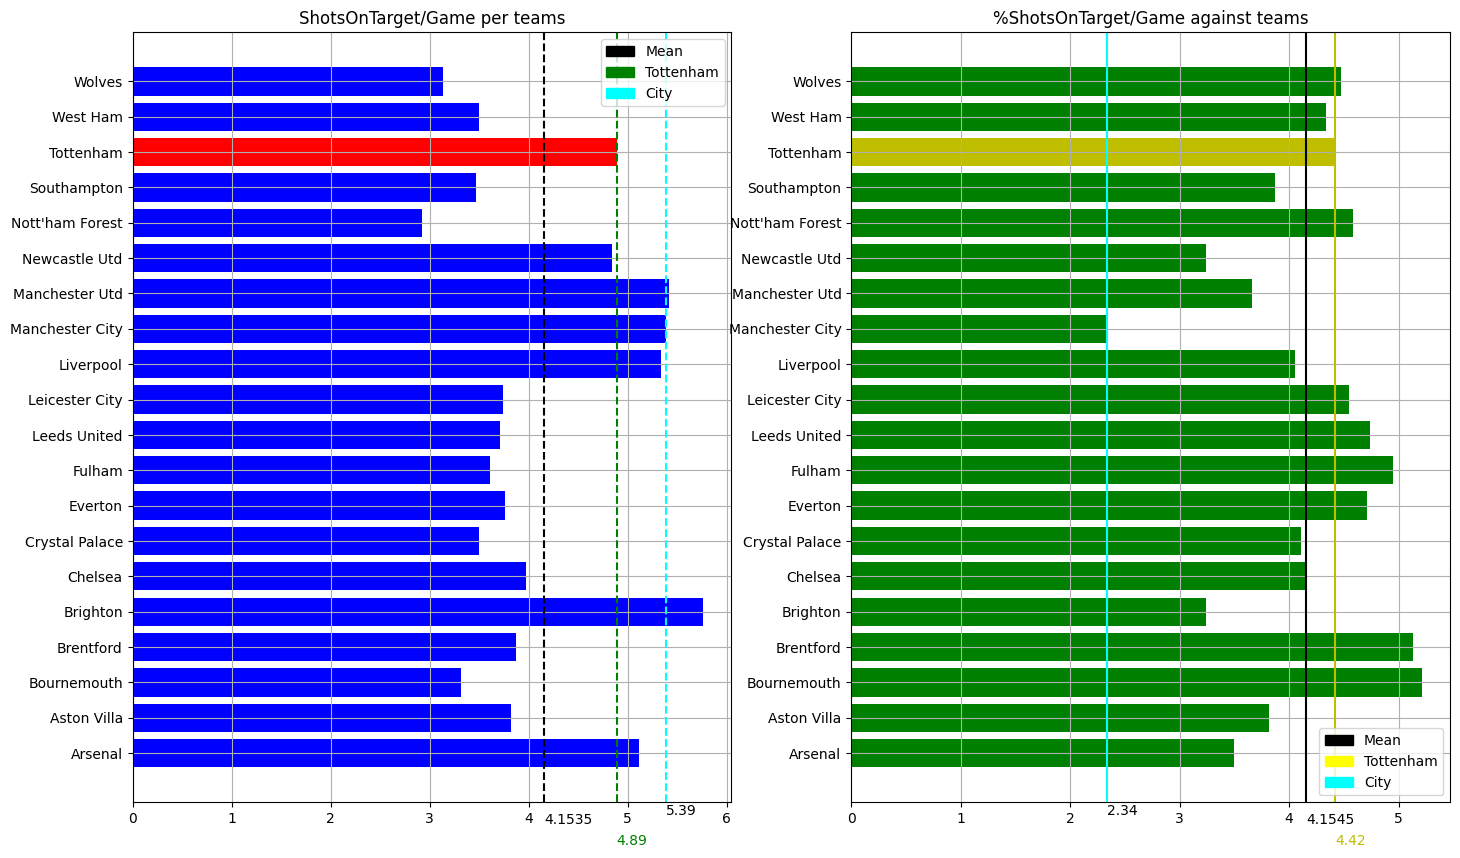

In [52]:
fig, ax = plt.subplots(1,2,figsize=(17,10))
colors = []
color = []
for value in list(dico.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax[0].barh(list(dico2.keys()),list(dico2.values()),color=colors)
ax[1].barh(list(dic2.keys()),list(dic2.values()),color=color)
ax[0].axvline(stat.mean(list(dico2.values())),color='black',linestyle='--')
ax[0].text(stat.mean(list(dico2.values())),-2, f'{stat.mean(list(dico2.values()))}',color='black')
ax[0].axvline(dico2["Tottenham"],color='green',linestyle='--')
ax[0].text(dico2["Tottenham"],-2.6, f'{dico2["Tottenham"]}',color='green')
ax[0].axvline(dico2["Manchester City"],color='cyan',linestyle='--')
ax[0].text(dico2["Manchester City"],-1.75, f'{dico2["Manchester City"]}')
ax[1].axvline(stat.mean(list(dic2.values())),color='black',linestyle='-')
ax[1].text(stat.mean(list(dic2.values())),-2, f'{stat.mean(list(dic2.values()))}',color='black')
ax[1].axvline(dic2["Tottenham"],color='y',linestyle='-')
ax[1].text(dic2["Tottenham"],-2.6, f'{dic2["Tottenham"]}',color='y')
ax[1].axvline(dic2["Manchester City"],color='cyan',linestyle='-')
ax[1].text(dic2["Manchester City"],-1.75, f'{dic2["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax[0].legend(handles=[p1,p2,p3])
ax[1].legend(handles=[p1,p4,p3])
ax[0].set_title('ShotsOnTarget/Game per teams')
ax[1].set_title('%ShotsOnTarget/Game against teams')
ax[0].grid(True)
ax[1].grid(True)

***subaxis2.4 : Goal per Shot on Target***

In [53]:
dico3 = df.set_index('Squad')['G/SoT'].to_dict()
dic3 = df1.set_index('Squad')['G/SoT'].to_dict()

In [54]:
d6 = dico3.copy()
d7 = dico3.copy()
for (key,value) in d6.items():
  if value > np.percentile(list(d6.values()),90):
    d7[key]=20
  if value <= np.percentile(list(d6.values()),90) and value > np.percentile(list(d6.values()),80):
    d7[key]=18
  if value <= np.percentile(list(d6.values()),80) and value > np.percentile(list(d6.values()),70):
    d7[key]=16
  if value <= np.percentile(list(d6.values()),70) and value > np.percentile(list(d6.values()),60):
    d7[key]=14
  if value <= np.percentile(list(d6.values()),60) and value > np.percentile(list(d6.values()),50):
    d7[key]=12
  if value <= np.percentile(list(d6.values()),50) and value > np.percentile(list(d6.values()),40):
    d7[key]=10
  if value <= np.percentile(list(d6.values()),40) and value > np.percentile(list(d6.values()),30):
    d7[key]=8
  if value <= np.percentile(list(d6.values()),30) and value > np.percentile(list(d6.values()),20):
    d7[key]=6
  if value <= np.percentile(list(d6.values()),20) and value > np.percentile(list(d6.values()),10):
    d7[key]=4
  if value <= np.percentile(list(d6.values()),10):
    d7[key]=2

pprint.pprint(d7)
print(f"Mean :{stat.mean(list(d7.values()))}\n")

dd6 = dic3.copy()
dd7 = dic3.copy()
for (key,value) in dd6.items():
  if value > np.percentile(list(dd6.values()),90):
    dd7[key]=2
  if value <= np.percentile(list(dd6.values()),90) and value > np.percentile(list(dd6.values()),80):
    dd7[key]=4
  if value <= np.percentile(list(dd6.values()),80) and value > np.percentile(list(dd6.values()),70):
    dd7[key]=6
  if value <= np.percentile(list(dd6.values()),70) and value > np.percentile(list(dd6.values()),60):
    dd7[key]=8
  if value <= np.percentile(list(dd6.values()),60) and value > np.percentile(list(dd6.values()),50):
    dd7[key]=10
  if value <= np.percentile(list(dd6.values()),50) and value > np.percentile(list(dd6.values()),40):
    dd7[key]=12
  if value <= np.percentile(list(dd6.values()),40) and value > np.percentile(list(dd6.values()),30):
    dd7[key]=14
  if value <= np.percentile(list(dd6.values()),30) and value > np.percentile(list(dd6.values()),20):
    dd7[key]=16
  if value <= np.percentile(list(dd6.values()),20) and value > np.percentile(list(dd6.values()),10):
    dd7[key]=18
  if value <= np.percentile(list(dd6.values()),10):
    dd7[key]=20

pprint.pprint(dd7)
print(f"Mean :{stat.mean(list(dd7.values()))}\n")

{'Arsenal': 20,
 'Aston Villa': 12,
 'Bournemouth': 10,
 'Brentford': 16,
 'Brighton': 8,
 'Chelsea': 4,
 'Crystal Palace': 8,
 'Everton': 2,
 'Fulham': 16,
 'Leeds United': 12,
 'Leicester City': 12,
 'Liverpool': 16,
 'Manchester City': 20,
 'Manchester Utd': 4,
 'Newcastle Utd': 12,
 "Nott'ham Forest": 10,
 'Southampton': 4,
 'Tottenham': 16,
 'West Ham': 4,
 'Wolves': 2}
Mean :10.4

{'Arsenal': 14,
 'Aston Villa': 18,
 'Bournemouth': 10,
 'Brentford': 20,
 'Brighton': 8,
 'Chelsea': 16,
 'Crystal Palace': 16,
 'Everton': 14,
 'Fulham': 20,
 'Leeds United': 2,
 'Leicester City': 6,
 'Liverpool': 14,
 'Manchester City': 8,
 'Manchester Utd': 14,
 'Newcastle Utd': 18,
 "Nott'ham Forest": 4,
 'Southampton': 2,
 'Tottenham': 4,
 'West Ham': 10,
 'Wolves': 8}
Mean :11.3



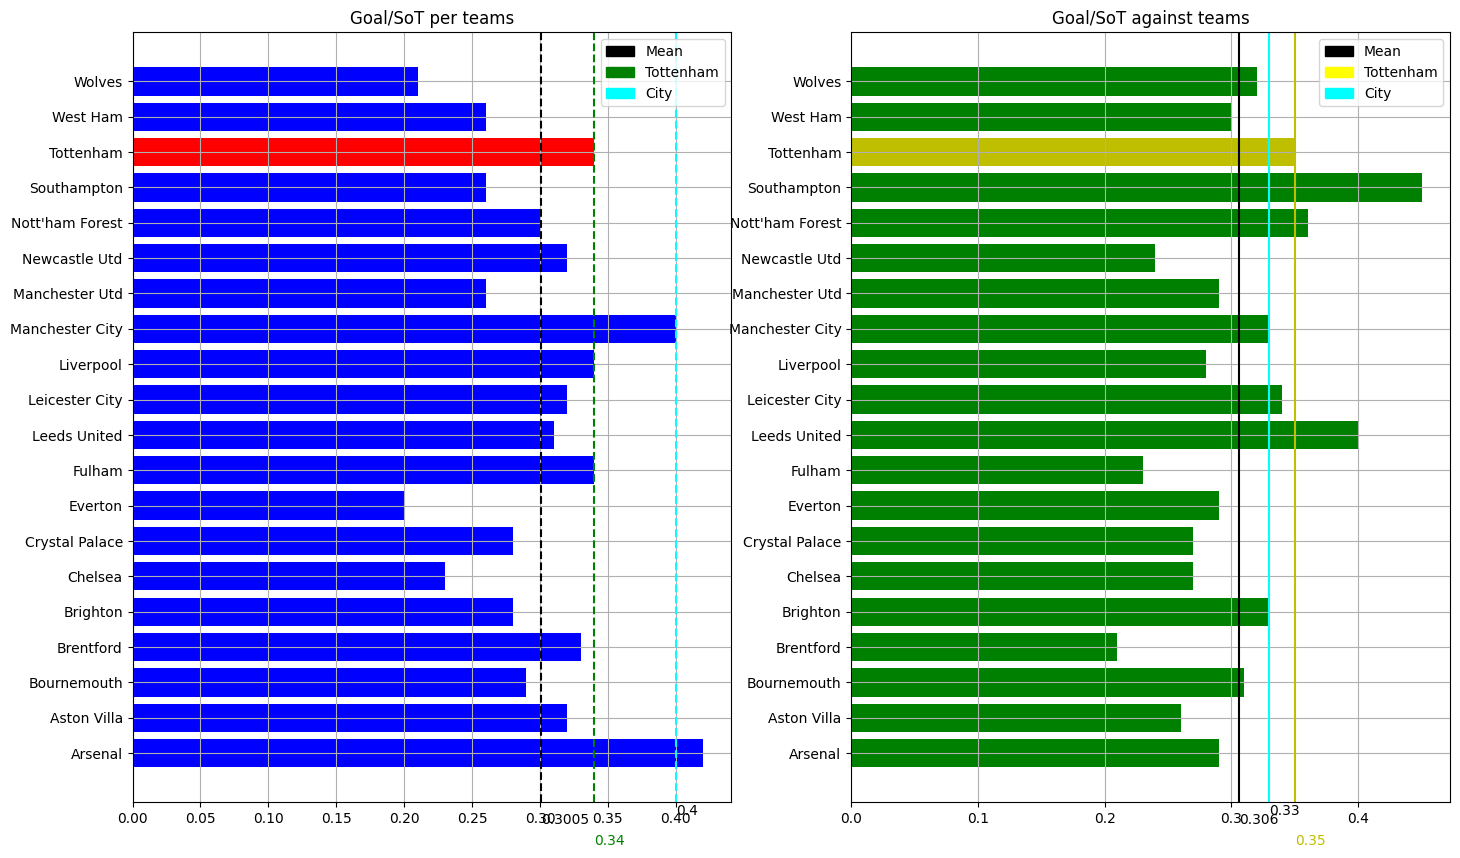

In [55]:
fig, ax = plt.subplots(1,2,figsize=(17,10))
colors = []
color = []
for value in list(dico.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax[0].barh(list(dico3.keys()),list(dico3.values()),color=colors)
ax[1].barh(list(dic3.keys()),list(dic3.values()),color=color)
ax[0].axvline(stat.mean(list(dico3.values())),color='black',linestyle='--')
ax[0].text(stat.mean(list(dico3.values())),-2, f'{stat.mean(list(dico3.values()))}',color='black')
ax[0].axvline(dico3["Tottenham"],color='green',linestyle='--')
ax[0].text(dico3["Tottenham"],-2.6, f'{dico3["Tottenham"]}',color='green')
ax[0].axvline(dico3["Manchester City"],color='cyan',linestyle='--')
ax[0].text(dico3["Manchester City"],-1.75, f'{dico3["Manchester City"]}')
ax[1].axvline(stat.mean(list(dic3.values())),color='black',linestyle='-')
ax[1].text(stat.mean(list(dic3.values())),-2, f'{stat.mean(list(dic3.values()))}',color='black')
ax[1].axvline(dic3["Tottenham"],color='y',linestyle='-')
ax[1].text(dic3["Tottenham"],-2.6, f'{dic3["Tottenham"]}',color='y')
ax[1].axvline(dic3["Manchester City"],color='cyan',linestyle='-')
ax[1].text(dic3["Manchester City"],-1.75, f'{dic3["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax[0].legend(handles=[p1,p2,p3])
ax[1].legend(handles=[p1,p4,p3])
ax[0].set_title('Goal/SoT per teams')
ax[1].set_title('Goal/SoT against teams')
ax[0].grid(True)
ax[1].grid(True)

***subaxis2.5 : Goal/Shot -xGoal/Shot***

In [56]:
dico4 = df.set_index('Squad')['G/Sh'].to_dict()
dico5 = df.set_index('Squad')['npxG/Sh'].to_dict()
dico6 = {key: dico4[key] - dico5.get(key, 0) for key in dico4}
dic4 = df1.set_index('Squad')['G/Sh'].to_dict()
dic5 = df1.set_index('Squad')['npxG/Sh'].to_dict()
dic6 = {key: dic4[key] - dic5.get(key, 0) for key in dic4}

In [57]:
d12 = dico6.copy()
d13 = dico6.copy()
for (key,value) in d12.items():
  if value > np.percentile(list(d12.values()),90):
    d13[key]=20
  if value <= np.percentile(list(d12.values()),90) and value > np.percentile(list(d12.values()),80):
    d13[key]=18
  if value <= np.percentile(list(d12.values()),80) and value > np.percentile(list(d12.values()),70):
    d13[key]=16
  if value <= np.percentile(list(d12.values()),70) and value > np.percentile(list(d12.values()),60):
    d13[key]=14
  if value <= np.percentile(list(d12.values()),60) and value > np.percentile(list(d12.values()),50):
    d13[key]=12
  if value <= np.percentile(list(d12.values()),50) and value > np.percentile(list(d12.values()),40):
    d13[key]=10
  if value <= np.percentile(list(d12.values()),40) and value > np.percentile(list(d12.values()),30):
    d13[key]=8
  if value <= np.percentile(list(d12.values()),30) and value > np.percentile(list(d12.values()),20):
    d13[key]=6
  if value <= np.percentile(list(d12.values()),20) and value > np.percentile(list(d12.values()),10):
    d13[key]=4
  if value <= np.percentile(list(d12.values()),10):
    d13[key]=2

pprint.pprint(d13)
print(f"Mean :{stat.mean(list(d13.values()))}\n")

dd12 = dic6.copy()
dd13 = dic6.copy()
for (key,value) in dd12.items():
  if value > np.percentile(list(dd12.values()),90):
    dd13[key]=2
  if value <= np.percentile(list(dd12.values()),90) and value > np.percentile(list(dd12.values()),80):
    dd13[key]=4
  if value <= np.percentile(list(dd12.values()),80) and value > np.percentile(list(dd12.values()),70):
    dd13[key]=6
  if value <= np.percentile(list(dd12.values()),70) and value > np.percentile(list(dd12.values()),60):
    dd13[key]=8
  if value <= np.percentile(list(dd12.values()),60) and value > np.percentile(list(dd12.values()),50):
    dd13[key]=10
  if value <= np.percentile(list(dd12.values()),50) and value > np.percentile(list(dd12.values()),40):
    dd13[key]=12
  if value <= np.percentile(list(dd12.values()),40) and value > np.percentile(list(dd12.values()),30):
    dd13[key]=14
  if value <= np.percentile(list(dd12.values()),30) and value > np.percentile(list(dd12.values()),20):
    dd13[key]=16
  if value <= np.percentile(list(dd12.values()),20) and value > np.percentile(list(dd12.values()),10):
    dd13[key]=18
  if value <= np.percentile(list(dd12.values()),10):
    dd13[key]=20

pprint.pprint(dd13)
print(f"Mean :{stat.mean(list(dd13.values()))}\n")

{'Arsenal': 20,
 'Aston Villa': 14,
 'Bournemouth': 10,
 'Brentford': 8,
 'Brighton': 6,
 'Chelsea': 2,
 'Crystal Palace': 14,
 'Everton': 2,
 'Fulham': 18,
 'Leeds United': 14,
 'Leicester City': 14,
 'Liverpool': 10,
 'Manchester City': 20,
 'Manchester Utd': 4,
 'Newcastle Utd': 6,
 "Nott'ham Forest": 8,
 'Southampton': 10,
 'Tottenham': 18,
 'West Ham': 4,
 'Wolves': 2}
Mean :10.2

{'Arsenal': 4,
 'Aston Villa': 20,
 'Bournemouth': 8,
 'Brentford': 16,
 'Brighton': 12,
 'Chelsea': 16,
 'Crystal Palace': 14,
 'Everton': 18,
 'Fulham': 20,
 'Leeds United': 2,
 'Leicester City': 12,
 'Liverpool': 14,
 'Manchester City': 12,
 'Manchester Utd': 18,
 'Newcastle Utd': 18,
 "Nott'ham Forest": 8,
 'Southampton': 4,
 'Tottenham': 2,
 'West Ham': 8,
 'Wolves': 12}
Mean :11.9



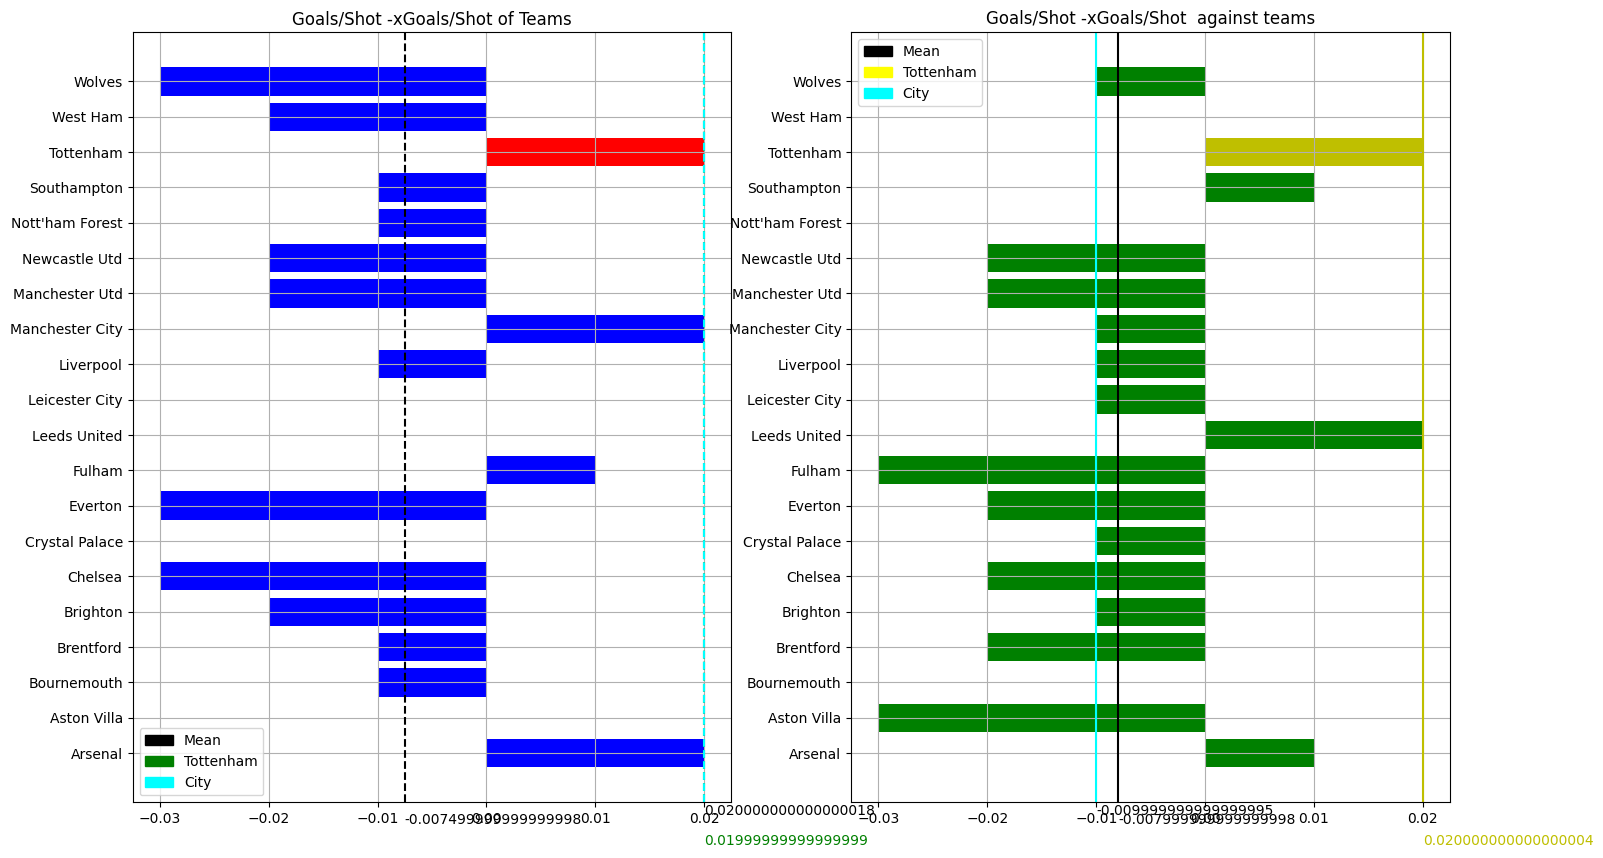

In [58]:
fig, ax = plt.subplots(1,2,figsize=(17,10))
colors = []
color = []
for value in list(dico.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax[0].barh(list(dico6.keys()),list(dico6.values()),color=colors)
ax[1].barh(list(dic6.keys()),list(dic6.values()),color=color)
ax[0].axvline(stat.mean(list(dico6.values())),color='black',linestyle='--')
ax[0].text(stat.mean(list(dico6.values())),-2, f'{stat.mean(list(dico6.values()))}',color='black')
ax[0].axvline(dico6["Tottenham"],color='green',linestyle='--')
ax[0].text(dico6["Tottenham"],-2.6, f'{dico6["Tottenham"]}',color='green')
ax[0].axvline(dico6["Manchester City"],color='cyan',linestyle='--')
ax[0].text(dico6["Manchester City"],-1.75, f'{dico6["Manchester City"]}')
ax[1].axvline(stat.mean(list(dic6.values())),color='black',linestyle='-')
ax[1].text(stat.mean(list(dic6.values())),-2, f'{stat.mean(list(dic6.values()))}',color='black')
ax[1].axvline(dic6["Tottenham"],color='y',linestyle='-')
ax[1].text(dic6["Tottenham"],-2.6, f'{dic6["Tottenham"]}',color='y')
ax[1].axvline(dic6["Manchester City"],color='cyan',linestyle='-')
ax[1].text(dic6["Manchester City"],-1.75, f'{dic6["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax[0].legend(handles=[p1,p2,p3])
ax[1].legend(handles=[p1,p4,p3])
ax[0].set_title('Goals/Shot -xGoals/Shot of Teams')
ax[1].set_title('Goals/Shot -xGoals/Shot  against teams')
ax[0].grid(True)
ax[1].grid(True)

In [59]:
def moyenne(liste):
  return sum(liste) / len(liste)


def calculer_moyenne(dictionnaires):
  dictionnaire_moyenne = {}
  for clé in dictionnaires[0].keys():
    valeurs = [dictionnaire[clé] for dictionnaire in dictionnaires]
    moyenne_valeur = moyenne(valeurs)
    dictionnaire_moyenne[clé] = moyenne_valeur
  return dictionnaire_moyenne


def afficher_dictionnaire(dictionnaire):
  for clé, valeur in dictionnaire.items():
    print(f"{clé}: {valeur}")


dictionnaires = [d1,dd1,d3,dd3,d5,dd5,d7,dd7,d13,dd13]

dictionnaire_moyenne = calculer_moyenne(dictionnaires)

dictionnaire_moyenne = dict(sorted(dictionnaire_moyenne.items(), key=lambda item: item[1], reverse=True))

afficher_dictionnaire(dictionnaire_moyenne)

Manchester City: 17.0
Manchester Utd: 14.2
Arsenal: 14.0
Aston Villa: 14.0
Liverpool: 13.8
Brighton: 12.524
Newcastle Utd: 12.324
Tottenham: 12.0
Fulham: 11.6
Brentford: 10.8
Crystal Palace: 10.6
Leicester City: 10.4
Chelsea: 10.2
Everton: 9.2
Bournemouth: 8.0
Southampton: 8.0
West Ham: 7.8
Leeds United: 7.4
Nott'ham Forest: 6.4
Wolves: 6.2


# ***2- Players Rating and selection***

In [60]:
data = pd.read_excel('/content/all_players_shooting_stats.xlsx')
games = data.set_index('Player')['90s'].to_dict()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


***subaxis2.1 : Number of shots***

In [61]:
sh = data.set_index('Player')['Sh'].to_dict()
dicttt = data.set_index('Player')['Squad'].to_dict()

In [62]:
ll= sh.copy()

for (key,value) in ll.copy().items():
  if value > np.percentile(list(ll.copy().values()),98):
    ll[key]=20
  if value <= np.percentile(list(ll.values()),98) and value > np.percentile(list(ll.values()),96):
    ll[key]=19
  if value <= np.percentile(list(ll.values()),96) and value > np.percentile(list(ll.values()),90):
    ll[key]=18
  if value <= np.percentile(list(ll.values()),90) and value > np.percentile(list(ll.values()),85):
    ll[key]=17
  if value <= np.percentile(list(ll.values()),85) and value > np.percentile(list(ll.values()),80):
    ll[key]=16
  if value <= np.percentile(list(ll.values()),80) and value > np.percentile(list(ll.values()),75):
    ll[key]=15
  if value <= np.percentile(list(ll.values()),75) and value > np.percentile(list(ll.values()),65):
    ll[key]=14
  if value <= np.percentile(list(ll.values()),65) and value > np.percentile(list(ll.values()),60):
    ll[key]=13
  if value <= np.percentile(list(ll.values()),60) and value > np.percentile(list(ll.values()),55):
    ll[key]=12
  if value <= np.percentile(list(ll.values()),55) and value > np.percentile(list(ll.values()),50):
    ll[key]=11
  if value <= np.percentile(list(ll.values()),50) and value > np.percentile(list(ll.values()),45):
    ll[key]=10
  if value <= np.percentile(list(ll.values()),45) and value > np.percentile(list(ll.values()),40):
    ll[key]=9
  if value <= np.percentile(list(ll.values()),40) and value > np.percentile(list(ll.values()),35):
    ll[key]=8
  if value <= np.percentile(list(ll.values()),35) and value > np.percentile(list(ll.values()),30):
    ll[key]=7
  if value <= np.percentile(list(ll.values()),30) and value > np.percentile(list(ll.values()),25):
    ll[key]=6
  if value <= np.percentile(list(ll.values()),25) and value > np.percentile(list(ll.values()),20):
    ll[key]=5
  if value <= np.percentile(list(ll.values()),20) and value > np.percentile(list(ll.values()),15):
    ll[key]=4
  if value <= np.percentile(list(ll.values()),15) and value > np.percentile(list(ll.values()),10):
    ll[key]=3
  if value <= np.percentile(list(ll.values()),10) and value > np.percentile(list(ll.values()),5):
    ll[key]=2
  if value <= np.percentile(list(ll.values()),5):
    ll[key]=1

pprint.pprint(ll)
print(f"Mean :{stat.mean(list(ll.values()))}\n")


{'Aaron Cresswell': 10,
 'Aaron Hickey': 11,
 'Aaron Ramsdale': 1,
 'Aaron Ramsey': 18,
 'Aaron Wan-Bissaka': 10,
 'Aaron Zehnter': 1,
 'Aarón Martín': 15,
 'Abdallah Sima': 20,
 'Abdelhamid Sabiri': 19,
 'Abdessamad Ezzalzouli': 18,
 'Abdou Diallo': 6,
 'Abdou Harroui': 13,
 'Abdoul Kader Bamba': 3,
 'Abdoulaye Bamba': 1,
 'Abdoulaye Doucouré': 15,
 'Abdu Conté': 7,
 'Abdul Mumin': 7,
 'Abdón Prats': 7,
 'Abner': 8,
 'Achraf Dari': 6,
 'Achraf Hakimi': 15,
 'Adam Armstrong': 15,
 'Adam Buksa': 1,
 'Adam Forshaw': 3,
 'Adam Hložek': 17,
 'Adam Lallana': 9,
 'Adam Marušić': 14,
 'Adam Masina': 5,
 'Adam Ounas': 18,
 'Adam Smith': 6,
 'Adam Webster': 15,
 'Adama Soumaoro': 5,
 'Adama Traoré': 17,
 'Ademola Lookman': 19,
 'Adil Aouchiche': 10,
 'Adil Rami': 10,
 'Adnan Januzaj': 1,
 'Ado Onaiwu': 17,
 'Adolfo Gaich': 16,
 'Adri Embarba': 5,
 'Adrian Grbić': 6,
 'Adrien Hunou': 18,
 'Adrien Rabiot': 20,
 'Adrien Tameze': 12,
 'Adrien Thomasson': 19,
 'Adrien Truffert': 10,
 'Adrià Pedrosa'

In [63]:
tt0 = ll.copy()
ttt = dicttt.copy()
g = games.copy()
for (key,value) in tt0.copy().items():
  if value < np.percentile(list(tt0.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt0[key]
pprint.pprint(tt0)

{'Abdallah Sima': 20,
 'Adrien Rabiot': 20,
 'Aleksandar Mitrović': 20,
 'Alexandre Lacazette': 20,
 'Alexis Mac Allister': 20,
 'Alexis Sánchez': 20,
 'Amine Gouiri': 20,
 'Andre-Frank Zambo Anguissa': 20,
 'Andrea Pinamonti': 20,
 'Andreas Pereira': 20,
 'Antoine Griezmann': 20,
 'Anton Stach': 20,
 'Antonio Sanabria': 20,
 'Arnaud Nordin': 20,
 'Arthur Theate': 20,
 'Aurélien Tchouaméni': 20,
 'Brais Méndez': 20,
 'Bruno Fernandes': 20,
 'Bryan Mbeumo': 20,
 'Callum Wilson': 20,
 'Carles Pérez': 20,
 'Cengiz Ünder': 20,
 'Christopher Nkunku': 20,
 'Ciro Immobile': 20,
 'Corentin Tolisso': 20,
 'Danny Welbeck': 20,
 'David Okereke': 20,
 'Destiny Udogie': 20,
 'Domenico Berardi': 20,
 'Dominic Solanke': 20,
 'Dominik Szoboszlai': 20,
 'Dušan Vlahović': 20,
 'Elye Wahi': 20,
 'Emanuele Valeri': 20,
 'Enes Ünal': 20,
 'Erling Haaland': 20,
 'Fabian Schär': 20,
 'Federico Valverde': 20,
 'Filip Đuričić': 20,
 'Florian Sotoca': 20,
 'Folarin Balogun': 20,
 'Gabriel Strefezza': 20,
 'Gabr

***subaxis2.2 : %Shot on Target***

In [64]:
sh1 = data.set_index('Player')['SoT%'].to_dict()

In [65]:
def replace_nan_values_with_l_keys(l):
  """Returns a new dictionary containing the original list, with NaN values replaced by 0, and using the keys of l as the keys of the dictionary."""
  dictionary = {}
  for key, value in l.items():
    if math.isnan(value):
      dictionary[key] = 0
    else:
      dictionary[key] = value
  return dictionary

sh1b = replace_nan_values_with_l_keys(sh1)

In [66]:
ll1= sh1b.copy()

for (key,value) in ll1.copy().items():
  if value > np.percentile(list(ll1.copy().values()),98):
    ll1[key]=20
  if value <= np.percentile(list(ll1.values()),98) and value > np.percentile(list(ll1.values()),96):
    ll1[key]=19
  if value <= np.percentile(list(ll1.values()),96) and value > np.percentile(list(ll1.values()),90):
    ll1[key]=18
  if value <= np.percentile(list(ll1.values()),90) and value > np.percentile(list(ll1.values()),85):
    ll1[key]=17
  if value <= np.percentile(list(ll1.values()),85) and value > np.percentile(list(ll1.values()),80):
    ll1[key]=16
  if value <= np.percentile(list(ll1.values()),80) and value > np.percentile(list(ll1.values()),75):
    ll1[key]=15
  if value <= np.percentile(list(ll1.values()),75) and value > np.percentile(list(ll1.values()),65):
    ll1[key]=14
  if value <= np.percentile(list(ll1.values()),65) and value > np.percentile(list(ll1.values()),60):
    ll1[key]=13
  if value <= np.percentile(list(ll1.values()),60) and value > np.percentile(list(ll1.values()),55):
    ll1[key]=12
  if value <= np.percentile(list(ll1.values()),55) and value > np.percentile(list(ll1.values()),50):
    ll1[key]=11
  if value <= np.percentile(list(ll1.values()),50) and value > np.percentile(list(ll1.values()),45):
    ll1[key]=10
  if value <= np.percentile(list(ll1.values()),45) and value > np.percentile(list(ll1.values()),40):
    ll1[key]=9
  if value <= np.percentile(list(ll1.values()),40) and value > np.percentile(list(ll1.values()),35):
    ll1[key]=8
  if value <= np.percentile(list(ll1.values()),35) and value > np.percentile(list(ll1.values()),30):
    ll1[key]=7
  if value <= np.percentile(list(ll1.values()),30) and value > np.percentile(list(ll1.values()),25):
    ll1[key]=6
  if value <= np.percentile(list(ll1.values()),25) and value > np.percentile(list(ll1.values()),20):
    ll1[key]=5
  if value <= np.percentile(list(ll1.values()),20) and value > np.percentile(list(ll1.values()),15):
    ll1[key]=4
  if value <= np.percentile(list(ll1.values()),15) and value > np.percentile(list(ll1.values()),10):
    ll1[key]=3
  if value <= np.percentile(list(ll1.values()),10) and value > np.percentile(list(ll1.values()),5):
    ll1[key]=2
  if value <= np.percentile(list(ll1.values()),5):
    ll1[key]=1

pprint.pprint(ll1)
print(f"Mean :{stat.mean(list(ll1.values()))}\n")


{'Aaron Cresswell': 8,
 'Aaron Hickey': 13,
 'Aaron Ramsdale': 1,
 'Aaron Ramsey': 17,
 'Aaron Wan-Bissaka': 18,
 'Aaron Zehnter': 1,
 'Aarón Martín': 18,
 'Abdallah Sima': 18,
 'Abdelhamid Sabiri': 18,
 'Abdessamad Ezzalzouli': 16,
 'Abdou Diallo': 13,
 'Abdou Harroui': 14,
 'Abdoul Kader Bamba': 20,
 'Abdoulaye Bamba': 1,
 'Abdoulaye Doucouré': 16,
 'Abdu Conté': 18,
 'Abdul Mumin': 13,
 'Abdón Prats': 20,
 'Abner': 9,
 'Achraf Dari': 18,
 'Achraf Hakimi': 18,
 'Adam Armstrong': 17,
 'Adam Buksa': 1,
 'Adam Forshaw': 1,
 'Adam Hložek': 16,
 'Adam Lallana': 20,
 'Adam Marušić': 18,
 'Adam Masina': 20,
 'Adam Ounas': 18,
 'Adam Smith': 17,
 'Adam Webster': 8,
 'Adama Soumaoro': 20,
 'Adama Traoré': 19,
 'Ademola Lookman': 18,
 'Adil Aouchiche': 14,
 'Adil Rami': 18,
 'Adnan Januzaj': 1,
 'Ado Onaiwu': 16,
 'Adolfo Gaich': 14,
 'Adri Embarba': 1,
 'Adrian Grbić': 1,
 'Adrien Hunou': 17,
 'Adrien Rabiot': 19,
 'Adrien Tameze': 13,
 'Adrien Thomasson': 20,
 'Adrien Truffert': 19,
 'Adrià 

In [67]:
tt1 = ll1.copy()
ttt = dicttt.copy()
g = games.copy()
for (key,value) in tt1.copy().items():
  if value < np.percentile(list(tt1.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt1[key]
pprint.pprint(tt1)

{'Adama Soumaoro': 20,
 'Andre-Frank Zambo Anguissa': 20,
 'Anthony Rouault': 20,
 'Caio Henrique Oliveira Silva': 20,
 'Callum Wilson': 20,
 'Danny Welbeck': 20,
 'Dominik Szoboszlai': 20,
 'Dušan Vlahović': 20,
 'Elye Wahi': 20,
 'Enes Ünal': 20,
 'Erhan Mašović': 20,
 'Ethan Pinnock': 20,
 'Fikayo Tomori': 20,
 'Filip Đuričić': 20,
 'Gabriel Veiga': 20,
 'Helibelton Palacios': 20,
 'Illan Meslier': 20,
 'Iñaki Williams': 20,
 'James Ward-Prowse': 20,
 'Jamie Vardy': 20,
 'Joe Willock': 20,
 'Joe Worrall': 20,
 'Kurt Zouma': 20,
 'Kyle Walker-Peters': 20,
 'Marco Verratti': 20,
 'Marcus Thuram': 20,
 'Mateusz Wieteska': 20,
 'Mattia Zaccagni': 20,
 'Miloš Veljković': 20,
 'Mitchell Weiser': 20,
 'Montassar Talbi': 20,
 'Neco Williams': 20,
 'Nico Williams': 20,
 'Nicola Zalewski': 20,
 'Nikola Vlašić': 20,
 'Ollie Watkins': 20,
 'Pau Torres': 20,
 'Piotr Zieliński': 20,
 'Raphaël Varane': 20,
 'Rasmus Nicolaisen': 20,
 'Sandro Tonali': 20,
 'Simon Terodde': 20,
 'Stefan de Vrij': 20,

***subaxis2.3 : Shot on Target per game***

In [68]:
sh2 = data.set_index('Player')['SoT/90'].to_dict()

In [69]:
ll2= sh2.copy()

for (key,value) in ll2.copy().items():
  if value > np.percentile(list(ll2.copy().values()),98):
    ll2[key]=20
  if value <= np.percentile(list(ll2.values()),98) and value > np.percentile(list(ll2.values()),96):
    ll2[key]=19
  if value <= np.percentile(list(ll2.values()),96) and value > np.percentile(list(ll2.values()),90):
    ll2[key]=18
  if value <= np.percentile(list(ll2.values()),90) and value > np.percentile(list(ll2.values()),85):
    ll2[key]=17
  if value <= np.percentile(list(ll2.values()),85) and value > np.percentile(list(ll2.values()),80):
    ll2[key]=16
  if value <= np.percentile(list(ll2.values()),80) and value > np.percentile(list(ll2.values()),75):
    ll2[key]=15
  if value <= np.percentile(list(ll2.values()),75) and value > np.percentile(list(ll2.values()),65):
    ll2[key]=14
  if value <= np.percentile(list(ll2.values()),65) and value > np.percentile(list(ll2.values()),60):
    ll2[key]=13
  if value <= np.percentile(list(ll2.values()),60) and value > np.percentile(list(ll2.values()),55):
    ll2[key]=12
  if value <= np.percentile(list(ll2.values()),55) and value > np.percentile(list(ll2.values()),50):
    ll2[key]=11
  if value <= np.percentile(list(ll2.values()),50) and value > np.percentile(list(ll2.values()),45):
    ll2[key]=10
  if value <= np.percentile(list(ll2.values()),45) and value > np.percentile(list(ll2.values()),40):
    ll2[key]=9
  if value <= np.percentile(list(ll2.values()),40) and value > np.percentile(list(ll2.values()),35):
    ll2[key]=8
  if value <= np.percentile(list(ll2.values()),35) and value > np.percentile(list(ll2.values()),30):
    ll2[key]=7
  if value <= np.percentile(list(ll2.values()),30) and value > np.percentile(list(ll2.values()),25):
    ll2[key]=6
  if value <= np.percentile(list(ll2.values()),25) and value > np.percentile(list(ll2.values()),20):
    ll2[key]=5
  if value <= np.percentile(list(ll2.values()),20) and value > np.percentile(list(ll2.values()),15):
    ll2[key]=4
  if value <= np.percentile(list(ll2.values()),15) and value > np.percentile(list(ll2.values()),10):
    ll2[key]=3
  if value <= np.percentile(list(ll2.values()),10) and value > np.percentile(list(ll2.values()),5):
    ll2[key]=2
  if value <= np.percentile(list(ll2.values()),5):
    ll2[key]=1

pprint.pprint(ll2)
print(f"Mean :{stat.mean(list(ll2.values()))}\n")


{'Aaron Cresswell': 5,
 'Aaron Hickey': 5,
 'Aaron Ramsdale': 1,
 'Aaron Ramsey': 3,
 'Aaron Wan-Bissaka': 1,
 'Aaron Zehnter': 1,
 'Aarón Martín': 6,
 'Abdallah Sima': 3,
 'Abdelhamid Sabiri': 4,
 'Abdessamad Ezzalzouli': 13,
 'Abdou Diallo': 8,
 'Abdou Harroui': 9,
 'Abdoul Kader Bamba': 13,
 'Abdoulaye Bamba': 1,
 'Abdoulaye Doucouré': 11,
 'Abdu Conté': 7,
 'Abdul Mumin': 3,
 'Abdón Prats': 5,
 'Abner': 9,
 'Achraf Dari': 7,
 'Achraf Hakimi': 8,
 'Adam Armstrong': 15,
 'Adam Buksa': 1,
 'Adam Forshaw': 1,
 'Adam Hložek': 10,
 'Adam Lallana': 8,
 'Adam Marušić': 5,
 'Adam Masina': 5,
 'Adam Ounas': 6,
 'Adam Smith': 1,
 'Adam Webster': 1,
 'Adama Soumaoro': 1,
 'Adama Traoré': 2,
 'Ademola Lookman': 12,
 'Adil Aouchiche': 17,
 'Adil Rami': 3,
 'Adnan Januzaj': 1,
 'Ado Onaiwu': 4,
 'Adolfo Gaich': 12,
 'Adri Embarba': 1,
 'Adrian Grbić': 1,
 'Adrien Hunou': 10,
 'Adrien Rabiot': 4,
 'Adrien Tameze': 1,
 'Adrien Thomasson': 2,
 'Adrien Truffert': 1,
 'Adrià Pedrosa': 1,
 'Adu Ares': 

In [70]:
tt2 = ll2.copy()
ttt = dicttt.copy()
g = games.copy()
for (key,value) in tt2.copy().items():
  if value < np.percentile(list(tt2.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt2[key]
pprint.pprint(tt2)

{'Alex Baena': 17,
 'Ante Budimir': 16,
 'Antony': 18,
 'Folarin Balogun': 18,
 'Habib Diallo': 15,
 'Harvey Barnes': 17,
 'Jonathan David': 15,
 'Karim Benzema': 18,
 'Ludovic Blas': 16,
 'Marvin Ducksch': 15,
 'Moussa Diaby': 15,
 'Saïd Benrahma': 16,
 'Tammy Abraham': 18,
 'Thijs Dallinga': 15,
 'Valentín Castellanos': 16,
 'Wissam Ben Yedder': 18,
 'Zakaria Aboukhlal': 18}


***subaxis2.4 : Goal per Shot on Target***

In [71]:
sh3 = data.set_index('Player')['G/SoT'].to_dict()
sh3b = replace_nan_values_with_l_keys(sh3)

In [72]:
ll3= sh3b.copy()

for (key,value) in ll3.copy().items():
  if value > np.percentile(list(ll3.copy().values()),98):
    ll3[key]=20
  if value <= np.percentile(list(ll3.values()),98) and value > np.percentile(list(ll3.values()),96):
    ll3[key]=19
  if value <= np.percentile(list(ll3.values()),96) and value > np.percentile(list(ll3.values()),90):
    ll3[key]=18
  if value <= np.percentile(list(ll3.values()),90) and value > np.percentile(list(ll3.values()),85):
    ll3[key]=17
  if value <= np.percentile(list(ll3.values()),85) and value > np.percentile(list(ll3.values()),80):
    ll3[key]=16
  if value <= np.percentile(list(ll3.values()),80) and value > np.percentile(list(ll3.values()),75):
    ll3[key]=15
  if value <= np.percentile(list(ll3.values()),75) and value > np.percentile(list(ll3.values()),65):
    ll3[key]=14
  if value <= np.percentile(list(ll3.values()),65) and value > np.percentile(list(ll3.values()),60):
    ll3[key]=13
  if value <= np.percentile(list(ll3.values()),60) and value > np.percentile(list(ll3.values()),55):
    ll3[key]=12
  if value <= np.percentile(list(ll3.values()),55) and value > np.percentile(list(ll3.values()),50):
    ll3[key]=11
  if value <= np.percentile(list(ll3.values()),50) and value > np.percentile(list(ll3.values()),45):
    ll3[key]=10
  if value <= np.percentile(list(ll3.values()),45) and value > np.percentile(list(ll3.values()),40):
    ll3[key]=9
  if value <= np.percentile(list(ll3.values()),40) and value > np.percentile(list(ll3.values()),35):
    ll3[key]=8
  if value <= np.percentile(list(ll3.values()),35) and value > np.percentile(list(ll3.values()),30):
    ll3[key]=7
  if value <= np.percentile(list(ll3.values()),30) and value > np.percentile(list(ll3.values()),25):
    ll3[key]=6
  if value <= np.percentile(list(ll3.values()),25) and value > np.percentile(list(ll3.values()),20):
    ll3[key]=5
  if value <= np.percentile(list(ll3.values()),20) and value > np.percentile(list(ll3.values()),15):
    ll3[key]=4
  if value <= np.percentile(list(ll3.values()),15) and value > np.percentile(list(ll3.values()),10):
    ll3[key]=3
  if value <= np.percentile(list(ll3.values()),10) and value > np.percentile(list(ll3.values()),5):
    ll3[key]=2
  if value <= np.percentile(list(ll3.values()),5):
    ll3[key]=1

pprint.pprint(ll3)
print(f"Mean :{stat.mean(list(ll3.values()))}\n")


{'Aaron Cresswell': 1,
 'Aaron Hickey': 1,
 'Aaron Ramsdale': 1,
 'Aaron Ramsey': 3,
 'Aaron Wan-Bissaka': 1,
 'Aaron Zehnter': 1,
 'Aarón Martín': 8,
 'Abdallah Sima': 3,
 'Abdelhamid Sabiri': 2,
 'Abdessamad Ezzalzouli': 9,
 'Abdou Diallo': 14,
 'Abdou Harroui': 11,
 'Abdoul Kader Bamba': 1,
 'Abdoulaye Bamba': 1,
 'Abdoulaye Doucouré': 14,
 'Abdu Conté': 14,
 'Abdul Mumin': 1,
 'Abdón Prats': 4,
 'Abner': 1,
 'Achraf Dari': 14,
 'Achraf Hakimi': 12,
 'Adam Armstrong': 11,
 'Adam Buksa': 1,
 'Adam Forshaw': 1,
 'Adam Hložek': 10,
 'Adam Lallana': 8,
 'Adam Marušić': 1,
 'Adam Masina': 8,
 'Adam Ounas': 4,
 'Adam Smith': 1,
 'Adam Webster': 1,
 'Adama Soumaoro': 1,
 'Adama Traoré': 2,
 'Ademola Lookman': 8,
 'Adil Aouchiche': 1,
 'Adil Rami': 1,
 'Adnan Januzaj': 1,
 'Ado Onaiwu': 6,
 'Adolfo Gaich': 9,
 'Adri Embarba': 1,
 'Adrian Grbić': 1,
 'Adrien Hunou': 8,
 'Adrien Rabiot': 4,
 'Adrien Tameze': 1,
 'Adrien Thomasson': 2,
 'Adrien Truffert': 1,
 'Adrià Pedrosa': 1,
 'Adu Ares': 1

In [73]:
tt3 = ll3.copy()
ttt = dicttt.copy()
g = games.copy()
for (key,value) in tt3.copy().items():
  if value < np.percentile(list(tt3.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt3[key]
pprint.pprint(tt3)

{'Alessandro Buongiorno': 16,
 'Beto': 15,
 'Bruno Amione': 16,
 'Copete': 15,
 'Danilo': 14,
 'Federico Baschirotto': 15,
 'Gleison Bremer': 16,
 'Haris Belkebla': 15,
 'Ismaël Bennacer': 16,
 'Jordan Ayew': 15,
 'Joseph Aidoo': 18,
 'Luke Ayling': 15,
 'Marcos Acuña': 18,
 'Matteo Darmian': 14,
 'Miguel Almirón': 18,
 'Miha Blažič': 15,
 'Nathan Aké': 16,
 'Nicolò Barella': 15,
 'Ridle Baku': 15,
 'Sergi Darder': 14,
 'Sheraldo Becker': 15,
 'Srđan Babić': 17,
 'Tommaso Augello': 16,
 'Yeray Álvarez': 18}


***subaxis2.5 : Goal/Shot -xGoal/Shot***

In [74]:
sh4 = data.set_index('Squad')['npxG/Sh'].to_dict()
sh5 = {key: sh[key] - sh4.get(key, 0) for key in sh}

In [75]:
ll4= sh5.copy()

for (key,value) in ll4.copy().items():
  if value > np.percentile(list(ll4.copy().values()),98):
    ll4[key]=20
  if value <= np.percentile(list(ll4.values()),98) and value > np.percentile(list(ll4.values()),96):
    ll4[key]=19
  if value <= np.percentile(list(ll4.values()),96) and value > np.percentile(list(ll4.values()),90):
    ll4[key]=18
  if value <= np.percentile(list(ll4.values()),90) and value > np.percentile(list(ll4.values()),85):
    ll4[key]=17
  if value <= np.percentile(list(ll4.values()),85) and value > np.percentile(list(ll4.values()),80):
    ll4[key]=16
  if value <= np.percentile(list(ll4.values()),80) and value > np.percentile(list(ll4.values()),75):
    ll4[key]=15
  if value <= np.percentile(list(ll4.values()),75) and value > np.percentile(list(ll4.values()),65):
    ll4[key]=14
  if value <= np.percentile(list(ll4.values()),65) and value > np.percentile(list(ll4.values()),60):
    ll4[key]=13
  if value <= np.percentile(list(ll4.values()),60) and value > np.percentile(list(ll4.values()),55):
    ll4[key]=12
  if value <= np.percentile(list(ll4.values()),55) and value > np.percentile(list(ll4.values()),50):
    ll4[key]=11
  if value <= np.percentile(list(ll4.values()),50) and value > np.percentile(list(ll4.values()),45):
    ll4[key]=10
  if value <= np.percentile(list(ll4.values()),45) and value > np.percentile(list(ll4.values()),40):
    ll4[key]=9
  if value <= np.percentile(list(ll4.values()),40) and value > np.percentile(list(ll4.values()),35):
    ll4[key]=8
  if value <= np.percentile(list(ll4.values()),35) and value > np.percentile(list(ll4.values()),30):
    ll4[key]=7
  if value <= np.percentile(list(ll4.values()),30) and value > np.percentile(list(ll4.values()),25):
    ll4[key]=6
  if value <= np.percentile(list(ll4.values()),25) and value > np.percentile(list(ll4.values()),20):
    ll4[key]=5
  if value <= np.percentile(list(ll4.values()),20) and value > np.percentile(list(ll4.values()),15):
    ll4[key]=4
  if value <= np.percentile(list(ll4.values()),15) and value > np.percentile(list(ll4.values()),10):
    ll4[key]=3
  if value <= np.percentile(list(ll4.values()),10) and value > np.percentile(list(ll4.values()),5):
    ll4[key]=2
  if value <= np.percentile(list(ll4.values()),5):
    ll4[key]=1

pprint.pprint(ll4)
print(f"Mean :{stat.mean(list(ll4.values()))}\n")


{'Aaron Cresswell': 10,
 'Aaron Hickey': 11,
 'Aaron Ramsdale': 1,
 'Aaron Ramsey': 18,
 'Aaron Wan-Bissaka': 10,
 'Aaron Zehnter': 1,
 'Aarón Martín': 15,
 'Abdallah Sima': 20,
 'Abdelhamid Sabiri': 19,
 'Abdessamad Ezzalzouli': 18,
 'Abdou Diallo': 6,
 'Abdou Harroui': 13,
 'Abdoul Kader Bamba': 3,
 'Abdoulaye Bamba': 1,
 'Abdoulaye Doucouré': 15,
 'Abdu Conté': 7,
 'Abdul Mumin': 7,
 'Abdón Prats': 7,
 'Abner': 8,
 'Achraf Dari': 6,
 'Achraf Hakimi': 15,
 'Adam Armstrong': 15,
 'Adam Buksa': 1,
 'Adam Forshaw': 3,
 'Adam Hložek': 17,
 'Adam Lallana': 9,
 'Adam Marušić': 14,
 'Adam Masina': 5,
 'Adam Ounas': 18,
 'Adam Smith': 6,
 'Adam Webster': 15,
 'Adama Soumaoro': 5,
 'Adama Traoré': 17,
 'Ademola Lookman': 19,
 'Adil Aouchiche': 10,
 'Adil Rami': 10,
 'Adnan Januzaj': 1,
 'Ado Onaiwu': 17,
 'Adolfo Gaich': 16,
 'Adri Embarba': 5,
 'Adrian Grbić': 6,
 'Adrien Hunou': 18,
 'Adrien Rabiot': 20,
 'Adrien Tameze': 12,
 'Adrien Thomasson': 19,
 'Adrien Truffert': 10,
 'Adrià Pedrosa'

In [76]:
tt4 = ll4.copy()
ttt = dicttt.copy()
g = games.copy()
for (key,value) in tt4.copy().items():
  if value < np.percentile(list(tt4.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt4[key]
pprint.pprint(tt4)

{'Abdallah Sima': 20,
 'Adrien Rabiot': 20,
 'Aleksandar Mitrović': 20,
 'Alexandre Lacazette': 20,
 'Alexis Mac Allister': 20,
 'Alexis Sánchez': 20,
 'Amine Gouiri': 20,
 'Andre-Frank Zambo Anguissa': 20,
 'Andrea Pinamonti': 20,
 'Andreas Pereira': 20,
 'Antoine Griezmann': 20,
 'Anton Stach': 20,
 'Antonio Sanabria': 20,
 'Arnaud Nordin': 20,
 'Arthur Theate': 20,
 'Aurélien Tchouaméni': 20,
 'Brais Méndez': 20,
 'Bruno Fernandes': 20,
 'Bryan Mbeumo': 20,
 'Callum Wilson': 20,
 'Carles Pérez': 20,
 'Cengiz Ünder': 20,
 'Christopher Nkunku': 20,
 'Ciro Immobile': 20,
 'Corentin Tolisso': 20,
 'Danny Welbeck': 20,
 'David Okereke': 20,
 'Destiny Udogie': 20,
 'Domenico Berardi': 20,
 'Dominic Solanke': 20,
 'Dominik Szoboszlai': 20,
 'Dušan Vlahović': 20,
 'Elye Wahi': 20,
 'Emanuele Valeri': 20,
 'Enes Ünal': 20,
 'Erling Haaland': 20,
 'Fabian Schär': 20,
 'Federico Valverde': 20,
 'Filip Đuričić': 20,
 'Florian Sotoca': 20,
 'Folarin Balogun': 20,
 'Gabriel Strefezza': 20,
 'Gabr

In [77]:
def moyenne(liste):
  return sum(liste) / len(liste)


def calculer_moyenne(dictionnaires):
  basic_dictionnaire_moyenne = {}
  for clé in dictionnaires[0].keys():
    valeurs = [dictionnaire[clé] for dictionnaire in dictionnaires]
    moyenne_valeur = moyenne(valeurs)
    basic_dictionnaire_moyenne[clé] = moyenne_valeur
  return basic_dictionnaire_moyenne


def afficher_dictionnaire(dictionnaire):
  for clé, valeur in dictionnaire.items():
    print(f"{clé}: {valeur}")


dictionnaires = [ll,ll1,ll2,ll3,ll4]

basic_dictionnaire_moyenne = calculer_moyenne(dictionnaires)

basic_dictionnaire_moyenne = dict(sorted(basic_dictionnaire_moyenne.items(), key=lambda item: item[1], reverse=True))

afficher_dictionnaire(basic_dictionnaire_moyenne)

Folarin Balogun: 17.6
Wissam Ben Yedder: 17.6
Zakaria Aboukhlal: 17.2
Harvey Barnes: 17.2
Tammy Abraham: 17.0
Julián Álvarez: 17.0
Iago Aspas: 17.0
Karim Benzema: 17.0
Valentín Castellanos: 17.0
Marco Asensio: 16.8
Julian Brandt: 16.8
Thijs Dallinga: 16.8
Jonathan David: 16.8
Habib Diallo: 16.8
Erling Haaland: 16.8
Amine Adli: 16.6
Miguel Almirón: 16.6
Arthur: 16.6
Taiwo Awoniyi: 16.6
Sheraldo Becker: 16.6
Moussa Diaby: 16.6
Ludovic Ajorque: 16.4
Felipe Anderson: 16.4
Marko Arnautović: 16.4
Alex Baena: 16.4
Martin Braithwaite: 16.4
Ángel Correa: 16.4
Marvin Ducksch: 16.4
Roberto Firmino: 16.4
Niclas Füllkrug: 16.4
Serge Gnabry: 16.4
Amine Gouiri: 16.4
Harry Kane: 16.4
Karim Adeyemi: 16.2
Ezequiel Ávila: 16.2
Jonathan Bamba: 16.2
Ross Barkley: 16.2
Ludovic Blas: 16.2
Antonio Candreva: 16.2
Edin Džeko: 16.2
Breel Embolo: 16.2
Antoine Griezmann: 16.2
Luis Alberto: 16.0
Antony: 16.0
Kevin Behrens: 16.0
Domenico Berardi: 16.0
Beto: 16.0
Ante Budimir: 16.0
Rémy Cabella: 16.0
Boulaye Dia: 16.

In [78]:
ll5= basic_dictionnaire_moyenne.copy()

for (key,value) in ll5.copy().items():
  if value > np.percentile(list(ll5.copy().values()),98):
    ll5[key]=20
  if value <= np.percentile(list(ll5.values()),98) and value > np.percentile(list(ll5.values()),96):
    ll5[key]=19
  if value <= np.percentile(list(ll5.values()),96) and value > np.percentile(list(ll5.values()),90):
    ll5[key]=18
  if value <= np.percentile(list(ll5.values()),90) and value > np.percentile(list(ll5.values()),85):
    ll5[key]=17
  if value <= np.percentile(list(ll5.values()),85) and value > np.percentile(list(ll5.values()),80):
    ll5[key]=16
  if value <= np.percentile(list(ll5.values()),80) and value > np.percentile(list(ll5.values()),75):
    ll5[key]=15
  if value <= np.percentile(list(ll5.values()),75) and value > np.percentile(list(ll5.values()),65):
    ll5[key]=14
  if value <= np.percentile(list(ll5.values()),65) and value > np.percentile(list(ll5.values()),60):
    ll5[key]=13
  if value <= np.percentile(list(ll5.values()),60) and value > np.percentile(list(ll5.values()),55):
    ll5[key]=12
  if value <= np.percentile(list(ll5.values()),55) and value > np.percentile(list(ll5.values()),50):
    ll5[key]=11
  if value <= np.percentile(list(ll5.values()),50) and value > np.percentile(list(ll5.values()),45):
    ll5[key]=10
  if value <= np.percentile(list(ll5.values()),45) and value > np.percentile(list(ll5.values()),40):
    ll5[key]=9
  if value <= np.percentile(list(ll5.values()),40) and value > np.percentile(list(ll5.values()),35):
    ll5[key]=8
  if value <= np.percentile(list(ll5.values()),35) and value > np.percentile(list(ll5.values()),30):
    ll5[key]=7
  if value <= np.percentile(list(ll5.values()),30) and value > np.percentile(list(ll5.values()),25):
    ll5[key]=6
  if value <= np.percentile(list(ll5.values()),25) and value > np.percentile(list(ll5.values()),20):
    ll5[key]=5
  if value <= np.percentile(list(ll5.values()),20) and value > np.percentile(list(ll5.values()),15):
    ll5[key]=4
  if value <= np.percentile(list(ll5.values()),15) and value > np.percentile(list(ll5.values()),10):
    ll5[key]=3
  if value <= np.percentile(list(ll5.values()),10) and value > np.percentile(list(ll5.values()),5):
    ll5[key]=2
  if value <= np.percentile(list(ll5.values()),5):
    ll5[key]=1

pprint.pprint(ll5)
print(f"Mean :{stat.mean(list(ll5.values()))}\n")


{'Aaron Cresswell': 8,
 'Aaron Hickey': 9,
 'Aaron Ramsdale': 1,
 'Aaron Ramsey': 14,
 'Aaron Wan-Bissaka': 9,
 'Aaron Zehnter': 1,
 'Aarón Martín': 14,
 'Abdallah Sima': 15,
 'Abdelhamid Sabiri': 14,
 'Abdessamad Ezzalzouli': 18,
 'Abdou Diallo': 11,
 'Abdou Harroui': 14,
 'Abdoul Kader Bamba': 9,
 'Abdoulaye Bamba': 1,
 'Abdoulaye Doucouré': 17,
 'Abdu Conté': 13,
 'Abdul Mumin': 7,
 'Abdón Prats': 10,
 'Abner': 8,
 'Achraf Dari': 12,
 'Achraf Hakimi': 16,
 'Adam Armstrong': 18,
 'Adam Buksa': 1,
 'Adam Forshaw': 5,
 'Adam Hložek': 17,
 'Adam Lallana': 13,
 'Adam Marušić': 12,
 'Adam Masina': 10,
 'Adam Ounas': 15,
 'Adam Smith': 7,
 'Adam Webster': 9,
 'Adama Soumaoro': 7,
 'Adama Traoré': 13,
 'Ademola Lookman': 18,
 'Adil Aouchiche': 12,
 'Adil Rami': 10,
 'Adnan Januzaj': 1,
 'Ado Onaiwu': 14,
 'Adolfo Gaich': 16,
 'Adri Embarba': 5,
 'Adrian Grbić': 6,
 'Adrien Hunou': 17,
 'Adrien Rabiot': 16,
 'Adrien Tameze': 9,
 'Adrien Thomasson': 14,
 'Adrien Truffert': 9,
 'Adrià Pedrosa'

In [79]:
tt5 = ll5.copy()
ttt = dicttt.copy()
g = games.copy()
for (key,value) in tt5.copy().items():
  if value < np.percentile(list(tt4.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt5[key]
pprint.pprint(tt5)

{'Alex Baena': 20,
 'Amine Gouiri': 20,
 'Antoine Griezmann': 20,
 'Antonio Candreva': 20,
 'Breel Embolo': 20,
 'Erling Haaland': 20,
 'Felipe Anderson': 20,
 'Folarin Balogun': 20,
 'Habib Diallo': 20,
 'Harry Kane': 20,
 'Harvey Barnes': 20,
 'Iago Aspas': 20,
 'Jonathan Bamba': 20,
 'Jonathan David': 20,
 'Julian Brandt': 20,
 'Karim Benzema': 20,
 'Ludovic Blas': 20,
 'Martin Braithwaite': 20,
 'Marvin Ducksch': 20,
 'Miguel Almirón': 20,
 'Moussa Diaby': 20,
 'Niclas Füllkrug': 20,
 'Serge Gnabry': 20,
 'Sheraldo Becker': 20,
 'Tammy Abraham': 20,
 'Thijs Dallinga': 20,
 'Valentín Castellanos': 20,
 'Wissam Ben Yedder': 20,
 'Zakaria Aboukhlal': 20}


In [80]:
def multiplier_valeurs(dictionnaire, n):
  return {clé: valeur * n for clé, valeur in dictionnaire.items()}

In [81]:
def somme_dictionnaires(dictionnaires):
  dictionnaire_somme = {}
  for clé, valeur in dictionnaires[0].items():
    dictionnaire_somme[clé] = sum([dictionnaire[clé] for dictionnaire in dictionnaires])
  return dictionnaire_somme

In [82]:
dictionnaires = [ multiplier_valeurs(ll, 0.3) , multiplier_valeurs(ll1, 0.15) , multiplier_valeurs(ll2, 0.2) ,multiplier_valeurs(ll3, 0.15),multiplier_valeurs(ll4, 0.2)]
ee = somme_dictionnaires(dictionnaires)

In [83]:
tt6 = ee.copy()
ttt = dicttt.copy()
g = games.copy()
for (key,value) in tt6.copy().items():
  if value < np.percentile(list(tt6.values()),98) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt6[key]
pprint.pprint(tt6)

{'Alex Baena': 16.95,
 'Amine Gouiri': 17.0,
 'Antoine Griezmann': 16.85,
 'Antony': 16.7,
 'Ciro Immobile': 16.55,
 'Domenico Berardi': 16.75,
 'Erling Haaland': 17.3,
 'Felipe Anderson': 16.45,
 'Folarin Balogun': 18.1,
 'Habib Diallo': 17.35,
 'Harry Kane': 17.0,
 'Harvey Barnes': 17.55,
 'Iago Aspas': 17.549999999999997,
 'Jarrod Bowen': 16.55,
 'Jonathan Bamba': 16.75,
 'Jonathan David': 17.35,
 'Julian Brandt': 16.95,
 'Karim Benzema': 17.65,
 'Ludovic Blas': 16.950000000000003,
 'Manolo Gabbiadini': 16.55,
 'Martin Braithwaite': 16.65,
 'Marvin Ducksch': 17.05,
 'Miguel Almirón': 17.0,
 'Moussa Diaby': 17.200000000000003,
 'Niclas Füllkrug': 17.0,
 'Olivier Giroud': 16.700000000000003,
 'Serge Gnabry': 17.0,
 'Sergio Camello': 16.549999999999997,
 'Sheraldo Becker': 17.0,
 'Son Heung-min': 16.7,
 'Tammy Abraham': 17.25,
 'Thijs Dallinga': 17.15,
 'Valentín Castellanos': 17.549999999999997,
 'Wissam Ben Yedder': 17.9,
 'Zakaria Aboukhlal': 17.799999999999997}


In [84]:
tt7 = ee.copy()
ttt = dicttt.copy()
g = games.copy()
for (key,value) in tt7.copy().items():
  if value < np.percentile(list(tt7.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt7[key]
pprint.pprint(tt7)

{'Alex Baena': 16.95,
 'Amine Gouiri': 17.0,
 'Erling Haaland': 17.3,
 'Folarin Balogun': 18.1,
 'Habib Diallo': 17.35,
 'Harry Kane': 17.0,
 'Harvey Barnes': 17.55,
 'Iago Aspas': 17.549999999999997,
 'Jonathan Bamba': 16.75,
 'Jonathan David': 17.35,
 'Julian Brandt': 16.95,
 'Karim Benzema': 17.65,
 'Ludovic Blas': 16.950000000000003,
 'Marvin Ducksch': 17.05,
 'Miguel Almirón': 17.0,
 'Moussa Diaby': 17.200000000000003,
 'Niclas Füllkrug': 17.0,
 'Serge Gnabry': 17.0,
 'Sheraldo Becker': 17.0,
 'Tammy Abraham': 17.25,
 'Thijs Dallinga': 17.15,
 'Valentín Castellanos': 17.549999999999997,
 'Wissam Ben Yedder': 17.9,
 'Zakaria Aboukhlal': 17.799999999999997}


In [85]:
dff  = pd.read_excel('/content/all_players_wages.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [86]:
w = dff.set_index('Player')['Annual Wages'].to_dict()

In [87]:
import re

In [88]:
ww = w.copy()
for key, value in ww.items():
    value = re.sub(r"\(.*\)", "", value)
    value = re.sub(r"\s+", "", value)
    ww[key] = value
pprint.pprint(ww)

{'Aaron Cresswell': '£2,600,000',
 'Aaron Hickey': '£1,560,000',
 'Aaron Ramsdale': '£3,120,000',
 'Aaron Ramsey': '€5,450,000',
 'Aaron Wan-Bissaka': '£4,680,000',
 'Aaron Zehnter': '€50,000',
 'Aarón Martín': '€2,000,000',
 'Abdallah Sima': '€1,240,000',
 'Abde Ezzalzouli': '€180,000',
 'Abdelhamid Sabiri': '€110,000',
 'Abdou Diallo': '€5,400,000',
 'Abdou Harroui': '€120,000',
 'Abdoul Kader Bamba': '€320,000',
 'Abdoulaye Bamba': '€330,000',
 'Abdoulaye Doucouré': '£6,240,000',
 'Abdoulaye Kamara': '€150,000',
 'Abdu Conté': '€700,000',
 'Abdul Mumin': '€350,000',
 'Abdón Prats': '€230,000',
 'Abner': '€1,000,000',
 'Achraf Dari': '€480,000',
 'Achraf Hakimi': '€14,550,000',
 'Adam Armstrong': '£2,860,000',
 'Adam Buksa': '€1,020,000',
 'Adam Forshaw': '£1,040,000',
 'Adam Hložek': '€1,880,000',
 'Adam Jakubech': '€250,000',
 'Adam Lallana': '£4,680,000',
 'Adam Marušić': '€1,670,000',
 'Adam Masina': '€1,150,000',
 'Adam Oudjani': '€50,000',
 'Adam Ounas': '€2,730,000',
 'Adam Sm

In [89]:
www = ww.copy()
for key, value in www.items():
  if www[key][0] == '€':
    www[key] = int(www[key].split('€')[1].replace(',',''))
  elif www[key][0] == '£':
    www[key] = int(www[key].split('£')[1].replace(',',''))
pprint.pprint(www)

{'Aaron Cresswell': 2600000,
 'Aaron Hickey': 1560000,
 'Aaron Ramsdale': 3120000,
 'Aaron Ramsey': 5450000,
 'Aaron Wan-Bissaka': 4680000,
 'Aaron Zehnter': 50000,
 'Aarón Martín': 2000000,
 'Abdallah Sima': 1240000,
 'Abde Ezzalzouli': 180000,
 'Abdelhamid Sabiri': 110000,
 'Abdou Diallo': 5400000,
 'Abdou Harroui': 120000,
 'Abdoul Kader Bamba': 320000,
 'Abdoulaye Bamba': 330000,
 'Abdoulaye Doucouré': 6240000,
 'Abdoulaye Kamara': 150000,
 'Abdu Conté': 700000,
 'Abdul Mumin': 350000,
 'Abdón Prats': 230000,
 'Abner': 1000000,
 'Achraf Dari': 480000,
 'Achraf Hakimi': 14550000,
 'Adam Armstrong': 2860000,
 'Adam Buksa': 1020000,
 'Adam Forshaw': 1040000,
 'Adam Hložek': 1880000,
 'Adam Jakubech': 250000,
 'Adam Lallana': 4680000,
 'Adam Marušić': 1670000,
 'Adam Masina': 1150000,
 'Adam Oudjani': 50000,
 'Adam Ounas': 2730000,
 'Adam Smith': 1820000,
 'Adam Webster': 2860000,
 'Adama Soumaoro': 1390000,
 'Adama Traoré': 2860000,
 'Ademola Lookman': 2310000,
 'Adil Aouchiche': 3600

In [90]:
u = dff.set_index('Player')['Pos'].to_dict()
h = dff.set_index('Player')['Squad'].to_dict()

In [91]:
wage_basic = tt7.copy()
ttt = dicttt.copy()
y = www.copy()
for (key,value) in wage_basic.copy().items():
  if y[key] > 4632716 and h[key]!="Tottenham" :
    del wage_basic[key]
pprint.pprint(wage_basic)

{'Alex Baena': 16.95,
 'Amine Gouiri': 17.0,
 'Folarin Balogun': 18.1,
 'Habib Diallo': 17.35,
 'Harry Kane': 17.0,
 'Harvey Barnes': 17.55,
 'Iago Aspas': 17.549999999999997,
 'Jonathan Bamba': 16.75,
 'Jonathan David': 17.35,
 'Ludovic Blas': 16.950000000000003,
 'Marvin Ducksch': 17.05,
 'Miguel Almirón': 17.0,
 'Moussa Diaby': 17.200000000000003,
 'Niclas Füllkrug': 17.0,
 'Sheraldo Becker': 17.0,
 'Thijs Dallinga': 17.15,
 'Valentín Castellanos': 17.549999999999997,
 'Zakaria Aboukhlal': 17.799999999999997}


In [92]:
for (key,value) in wage_basic.copy().items():
  wage_basic[key]=u[key]
pprint.pprint(wage_basic)

{'Alex Baena': 'MF,FW',
 'Amine Gouiri': 'FW,MF',
 'Folarin Balogun': 'FW',
 'Habib Diallo': 'FW',
 'Harry Kane': 'FW',
 'Harvey Barnes': 'FW,MF',
 'Iago Aspas': 'FW',
 'Jonathan Bamba': 'FW',
 'Jonathan David': 'FW',
 'Ludovic Blas': 'MF,FW',
 'Marvin Ducksch': 'FW',
 'Miguel Almirón': 'FW',
 'Moussa Diaby': 'FW,MF',
 'Niclas Füllkrug': 'FW',
 'Sheraldo Becker': 'FW',
 'Thijs Dallinga': 'FW',
 'Valentín Castellanos': 'FW',
 'Zakaria Aboukhlal': 'FW,MF'}
